In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import chi2_contingency 
import scipy
scipy.__version__

'1.9.3'

In [2]:
df = pd.read_csv('/Users/christianrim/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
males = df.loc[ df['sex'] == 'male'].copy()
females = df.loc[ df['sex'] == 'female'].copy()

In [5]:
smok = df.loc[ df['smoker'] == 'yes'].copy()
non_smok = df.loc[ df['smoker'] == 'no'].copy()

In [6]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
southeast_df = df.loc[ df['region'] == 'southeast'].copy()
southwest_df = df.loc[ df['region'] == 'southwest'].copy()
northwest_df = df.loc[ df['region'] == 'northwest'].copy()
northeast_df = df.loc[ df['region'] == 'northeast'].copy()


In [8]:
low_end = 55.0
high_end = 56.0

# Do smokers have higher insurance charges than non-smokers?

### State the hypothesis and null hypothesis

- Null Hypothesis: There is no significant difference between smokers and charges. 
- Alternative Hypothesis: There is a significant difference between smokers and charges. 

### Determine the correct test

- Tupe of Data: Numerical
- How many groups/samples: 2
- We will be using a 2 sample t test. 

### Visualize and separate the data for hypothesis

In [9]:
## checking the charges column's descriptive stats
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [10]:
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [11]:
## creating a column that easily separates the smoker group
df['is_smoke'] = df['smoker'].str.contains('yes')
df['is_smoke'].value_counts()

False    1064
True      274
Name: is_smoke, dtype: int64

In [12]:
## saving the list of colums needed 
needed_cols = ['is_smoke','charges']
df[needed_cols]

,is_smoke,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [13]:
## saving people who smoke separately
smoke_df = df.loc[df['is_smoke'] ==True, needed_cols]
smoke_df

,is_smoke,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [14]:
non_smoke_df = df.loc[df['is_smoke'] == False, needed_cols]
non_smoke_df

,is_smoke,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [15]:
## making a dataframe for a visual by concatting the groups
plot_df =  pd.concat([smoke_df,non_smoke_df])
plot_df

,is_smoke,charges
0,True,16884.9240
11,True,27808.7251
14,True,39611.7577
19,True,36837.4670
23,True,37701.8768
...,...,...
1332,False,11411.6850
1333,False,10600.5483
1334,False,2205.9808
1335,False,1629.8335


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot: xlabel='is_smoke', ylabel='charges'>

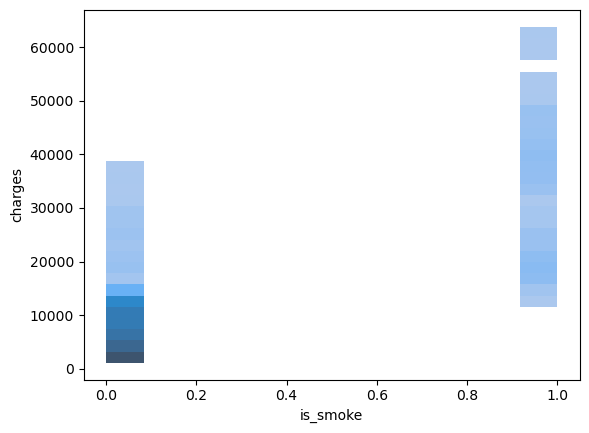

In [16]:
sns.histplot(data=plot_df, x='is_smoke',y='charges')

## Testing Assumption

### Checking Assumption of No Sig. Outliers

In [52]:
smoke_charges = smok['charges']
non_smoke_charges = non_smok['charges']

In [53]:
# checking for outliers in charges for the smoking group

zscores= stats.zscore(smoke_charges)
outliers = abs(zscores)>3
np.sum(outliers)


0

In [54]:
zscores= stats.zscore(non_smoke_charges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [55]:
# remove outliers from the non smoker group
non_smoke_charges = non_smoke_charges[(np.abs(stats.zscore(non_smoke_charges)) < 3)]

### Test for Normality

In [24]:
# testing the smoker group for normality
result_smoker_charge = stats.normaltest(smoke_charges)
result_smoker_charge

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [25]:
result_no_smoker_charge = stats.normaltest(non_smoke_charges)
result_no_smoker_charge

NormaltestResult(statistic=70.72942109230829, pvalue=4.378258058526592e-16)

- The P-value for both groups are well below 0.05 which means our data is not normally distributed.

### Check for Equal Variance

In [26]:
# Test for equal variance
result = stats.levene(smoke_charges, non_smoke_charges)
result

LeveneResult(statistic=672.9614970899742, pvalue=8.519436906838144e-120)

### Performing the T-Test

In [27]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoke_charges, non_smoke_charges, equal_var = False)
result

Ttest_indResult(statistic=34.32521687276006, pvalue=3.183690185070226e-105)

- Our P-value is less than 0.05, so we reject the null hypothesis and accept the alternative hypothesis that smokers have higher insurance charges. 

# Are men more likely to smoke than women?

### State the hypothesis and null hypothesis

- Null Hypothesis: There is no significant difference between the distribution of who smokes more based on gender. 
- Alternative Hypothesis: There is a significant difference between the distribution of who smokes more based on gender. 

### Determine the correct test 

- Type of Data: Categorical
- How many groups/samples: 2 groups
- Therefore, will be using the Chi-Test

In [28]:
## descriptive stats for the 'smoker' column
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

## Determine the correct test

- Type of Data: Numeric
- How many groups? 2 groups
- Therefore, a 2 sample t-test is right. 

### Visualize and separate the data for hypothesis

#### Separating the 'sex' column

In [29]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [30]:
## separating the sex column 
df['has_male'] = df['sex'].str.contains('male')
df['has_male'].value_counts()

## saving a list of columns
needed_cols = ['has_male','smoker']
df[needed_cols]

,has_male,smoker
0,True,yes
1,True,no
2,True,no
3,True,no
4,True,no
...,...,...
1333,True,no
1334,True,no
1335,True,no
1336,True,no


In [31]:
## saving the male team
male_df = df.loc[df['has_male'] == True, needed_cols]

female_df = df.loc[df['has_male'] == False, needed_cols]

plot_df =  pd.concat([female_df,male_df])
plot_df

,has_male,smoker
0,True,yes
1,True,no
2,True,no
3,True,no
4,True,no
...,...,...
1333,True,no
1334,True,no
1335,True,no
1336,True,no


### Visualize the smokers count

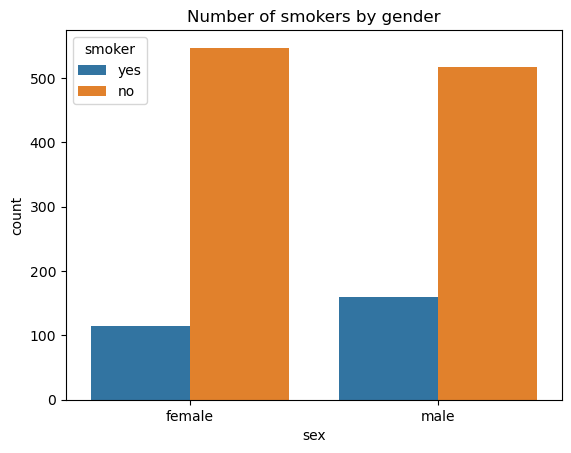

In [32]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smokers by gender");

## Testing Assumptions

### Test for Normality

In [33]:
# measuring the contingency table with the cross tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [34]:
# running the test and saving the result
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result 

In [35]:
# pvalue
print(p)
p<.05

0.006548143503580696


True

- The p-value is less than 0.05. Since our p < 0.05, we reject the null hypothesis that there is no relationship between smoking based on genders. 
- This means that we reject the null and accept the alternate hypothesis. I conclude that there more men are likely to smoke than women. 

# Do different regions have different charges, on average?

### State the hypothesis and null hypothesis

- Null Hypothesis: There is no statistical difference between the regions on charges. 

- Alternative Hypothesis: There is a statistical difference between the regions on charges. 

## Determine the correct test

- Type of Data: Numeric
- How many groups? 4 groups
- Therefore, Anova is the best test. 

### Visualize and separate the data for hypothesis

In [36]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [37]:
region_southeast_charge = southeast_df['charges']
region_southwest_charge = southwest_df['charges']
region_northwest_charge = northwest_df['charges']
region_northeast_charge = northeast_df['charges']

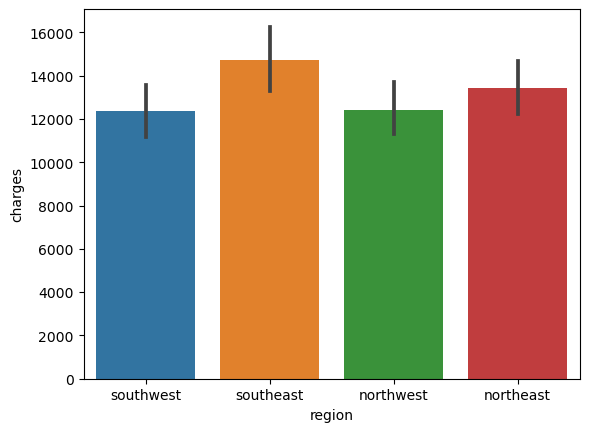

In [38]:
sns.barplot(data=df, x='region',y='charges');

In [39]:
## creating a groups dictionary
groups = {}
## looping through all unique categories
for i in df['region'].unique():
    ## getting the series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # saving
    groups[i] = data
groups.keys()



dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## Testing Assumptions

### Test for Normality

In [43]:
## running the normal test on each group and confirming there are > 20 in each region

### checking sig with pandas 
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


- Each region has a normal distribution

In [44]:
### checking to see each region has a normal distribution 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


### Testing Assumptions of Equal Variance

In [46]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

### ANOVA Test

In [42]:
# performing the anova test
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

### Tukey's Pairwise Multiple Comparisons Test


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [ ]:
## performing the tukey's multiple comparison test
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

In [49]:
result_final = stats.kruskal(*groups.values())
result_final

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

- Based on the pvalue of the Kruskal Test, we fail to reject the null since the value is greater than the alpha.  We will accept the alternative hypothesis. 